# House_Price_Prediction

*Abount the Dataset:
Used in Belsley, Kuh & Welsch, 'Regression diagnostics …', Wiley,1980. N.B. Various transformations are used in the table on pages 244-261. Quinlan (1993). Combining Instance-Based and Model-Based Learning. In Proceedings on the Tenth International Conference of Machine Learning, 236-243, University of Massachusetts, Amherst. Morgan Kaufmann.

** Relevant Information: Concerns housing values in suburbs of Boston.
** Number of Instances: 509
** Number of Attributes: 13 continuous attributes 1 binary-valued attribute.

Attribute Information:

1) CRIM : per capita crime rate by town.
2) ZN : proportion of residential land zoned for lots over 25,000 sq.ft.
3) INDUS: proportion of non-retail business acres per town.
4) CHAS : Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).
5) NOX : nitric oxides concentration (parts per 10 million).
6) RM : average number of rooms per dwelling.
7) AGE : proportion of owner-occupied units built prior to 1940.
8) DIS : weighted distances to five Boston employment centres.
9) RAD : index of accessibility to radial highways.
10) TAX : full-value property-tax rate per $10,000.
11) PTRATIO : pupil-teacher ratio by town.
12) B : 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town.
13) LSTAT: % lower status of the population.
14) price:the price of the data

In [2]:
# Import necessary libraries for numerical operations and data manipulation
import numpy as np  # For numerical operations
import pandas as pd  # For data manipulation and analysis

# Import functions from scikit-learn for model training and evaluation
from sklearn.model_selection import train_test_split  # For splitting the dataset into training and testing sets
from sklearn.metrics import accuracy_score  # For calculating the accuracy of the model
from sklearn.linear_model import LinearRegression  # For creating and training a linear regression model
from sklearn import metrics  # For additional evaluation metrics

# Import XGBoost library for training gradient boosting models
from xgboost import XGBRegressor  # For creating and training an XGBoost regression model

# Import libraries for data visualization
import matplotlib.pyplot as plt  # For creating static, animated, and interactive visualizations
import seaborn as sea  # For making statistical graphics (based on matplotlib)


In [3]:
df=pd.read_csv("BostonHousing.csv")  # Load the dataset into a DataFrame

In [13]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,price
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [14]:
df.shape #give the shape of the dataframe

(506, 14)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  price    506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [16]:
df.describe()  # give full info of the dataframe

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [17]:
df.isna().sum() #check for any null values

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
price      0
dtype: int64

In [18]:
# Split the data into features (X) and target (y)
x=df.iloc[:,:-1]
y=df["price"]

In [19]:
corr=df.corr()  # gives the correlation of the data

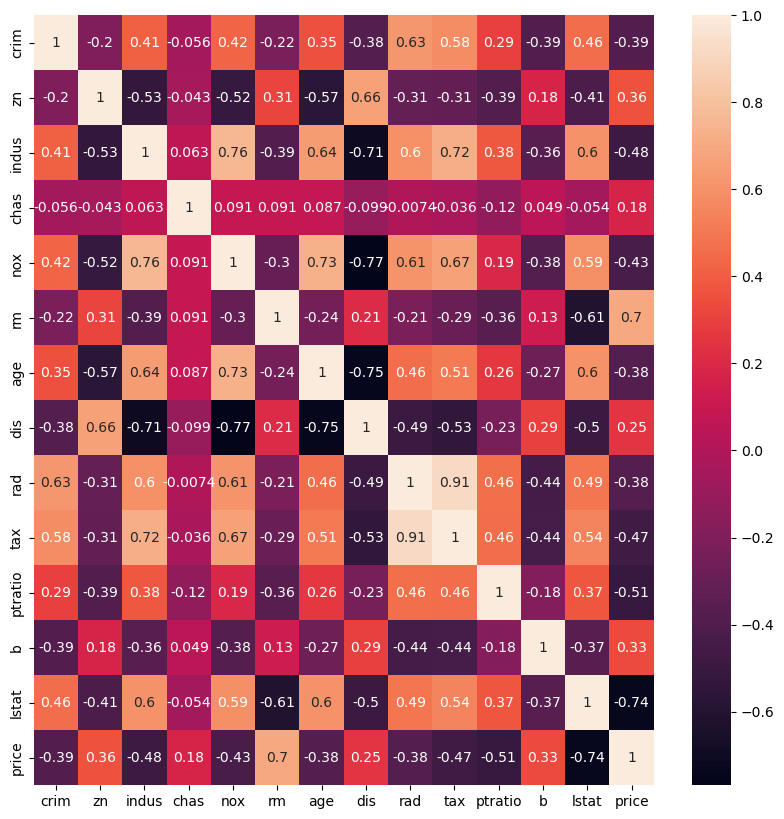

In [20]:
# Set the size of the figure for the heatmap
plt.figure(figsize=(10, 10))  # Creates a figure with a size of 10x10 inches

# Create a heatmap using seaborn to visualize the correlation matrix
sea.heatmap(corr, annot=True)  # Generates a heatmap of the correlation matrix 'corr' with annotations

# Display the heatmap
plt.show()  # Renders and displays the heatmap


In [21]:
# Split the data into training and testing sets
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=5)

In [22]:
x_train.shape,y_train.shape

((404, 13), (404,))

In [23]:
# Initialize the Linear Regression model
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [24]:
accuracy_xtrain=lr.score(x_train,y_train)
print("The accuracy of x_train data is",accuracy_xtrain)

The accuracy of x_train data is 0.738339392059052


In [25]:
# Calculate the accuracy of the model
accuracy_xtrain=lr.score(x_test,y_test)
print("The accuracy of x_train data is",accuracy_xtrain)

The accuracy of x_train data is 0.7334492147453082


In [26]:
pred_xtrain=lr.predict(x_train)
score_1=metrics.mean_absolute_error(y_train,pred_xtrain)
score_1

3.350009519648457

In [27]:
pred_xtest=lr.predict(x_test)
score_2=metrics.mean_absolute_error(y_test,pred_xtest)
score_2

3.213270495842383

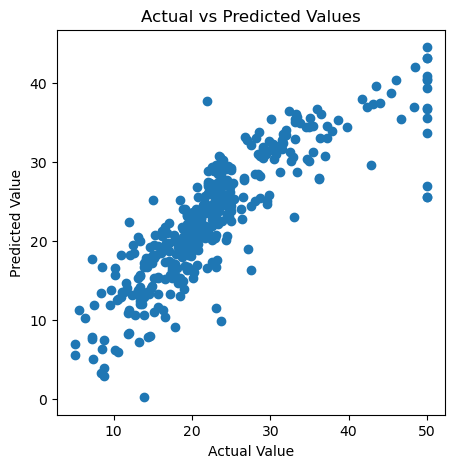

In [28]:
# Create a figure and a set of subplots with a specified size
fig, ax = plt.subplots(figsize=(5, 5))  # Creates a figure with a single subplot (ax) of size 5x5 inches

# Create a scatter plot on the specified axes
ax.scatter(y_train, pred_xtrain)  # Plots actual values (y_train) against predicted values (pred_xtrain) on the scatter plot

# Plot method is redundant here and can be removed

# Set the x-axis label
ax.set_xlabel("Actual Value")  # Labels the x-axis as 'Actual Value'

# Set the y-axis label
ax.set_ylabel("Predicted Value")  # Labels the y-axis as 'Predicted Value'

# Set the title of the plot
ax.set_title("Actual vs Predicted Values")  # Sets the title of the plot to 'Actual vs Predicted Values'

# Display the plot
plt.show()  # Renders and displays the plot


In [30]:
# Define the input data for a single house (features of the house)
input_data = (0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.1)

# Convert the input data to a NumPy array
predicted_house_price = np.array(input_data)

# Reshape the array to match the expected input shape for the model (1 sample, n features)
predicted_house_price = predicted_house_price.reshape(1, -1)

# Use the trained linear regression model to make a prediction on the reshaped input data
predicted_house_price = lr.predict(predicted_house_price)

# Print the predicted house price
print(predicted_house_price)


[18.54046999]


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [20]:
# Initialize the XGB Regression model
model_xgb=XGBRegressor()

In [21]:
model_xgb.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [22]:
# Calculate the accuracy of the model
accuracy_xtrain_xgb=model_xgb.score(x_train,y_train)
print("The accuracy of x_train data is",accuracy_xtrain_xgb)

The accuracy of x_train data is 0.9999975984095375


In [23]:
accuracy_xtrain_xgb=model_xgb.score(x_test,y_test)
print("The accuracy of x_train data is",accuracy_xtrain_xgb)

The accuracy of x_train data is 0.8746904274642477


In [24]:
pred_xtrain_xgb=model_xgb.predict(x_train)
score_1=metrics.mean_absolute_error(y_train,pred_xtrain_xgb)
score_1

0.009723323406559419

In [25]:
pred_xtest_xgb=model_xgb.predict(x_test)
score_2=metrics.mean_absolute_error(y_test,pred_xtest_xgb)
score_2

2.143903751934276

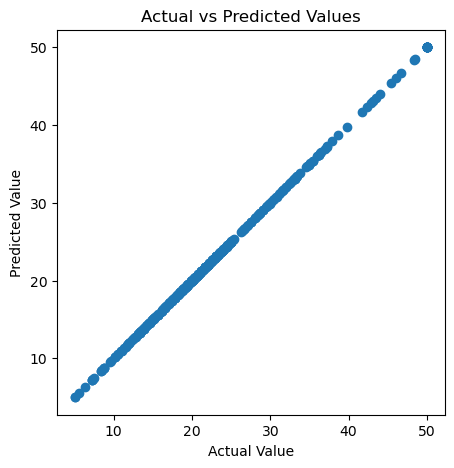

In [26]:
# Create a figure and a set of subplots with a specified size
fig, ax = plt.subplots(figsize=(5, 5))  # Creates a figure with a single subplot (ax) of size 5x5 inches

# Create a scatter plot on the specified axes
ax.scatter(y_train, pred_xtrain_xgb)  # Plots actual values (y_train) against predicted values from XGBoost model (pred_xtrain_xgb) on the scatter plot

# Plot method is redundant here and can be removed, as it does not add anything in this context

# Set the x-axis label
ax.set_xlabel("Actual Value")  # Labels the x-axis as 'Actual Value'

# Set the y-axis label
ax.set_ylabel("Predicted Value")  # Labels the y-axis as 'Predicted Value'

# Set the title of the plot
ax.set_title("Actual vs Predicted Values")  # Sets the title of the plot to 'Actual vs Predicted Values'

# Display the plot
plt.show()  # Renders and displays the plot


In [27]:
# Define input data for a single house (features of the house)
input_data = (0.19802, 0, 10.59, 0, 0.489, 6.182, 42.4, 3.9454, 4, 277, 18.6, 393.63, 9.47)

# Convert the input data to a NumPy array and reshape it to match the model's input shape
predicted_house_price = np.array(input_data).reshape(1, -1)

# Use the trained XGBoost model to predict the house price
predicted_house_price = model_xgb.predict(predicted_house_price)

# Print the predicted house price
print("Predicted House Price:", predicted_house_price)


Predicted House Price: [25.057135]
